## 讀取存貨數據

In [1]:
import pandas
df = pandas.read_csv('TradeInventories.csv', index_col = 'Date')

In [2]:
df.head()

,Inventories
Date,
1/1/1997,1301161
2/1/1997,1307080
3/1/1997,1303978
4/1/1997,1319740
5/1/1997,1327294


## 產生特徵

In [3]:
for i in range(1,13):
    df['t{}'.format(i)] = df['Inventories'].shift(i)

In [4]:
df.dropna(inplace=True)

In [5]:
df = df[['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9',
       't10', 't11', 't12', 'Inventories']]


## 產生訓練與測試數據

In [6]:
trainset = df.iloc[0:180,:]
testset = df.iloc[180:,:]

In [7]:
train_X = trainset[['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9',
       't10', 't11', 't12']]
train_y = trainset['Inventories']

In [8]:
test_X = testset[['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9',
       't10', 't11', 't12']]
test_y = testset['Inventories']

## 訓練模型

In [9]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(train_X,train_y)

LinearRegression()

## 產生預測結果

In [10]:
pred_y = clf.predict(test_X)

In [11]:
res = test_y.to_frame()

In [12]:
res['pred_y'] = pred_y

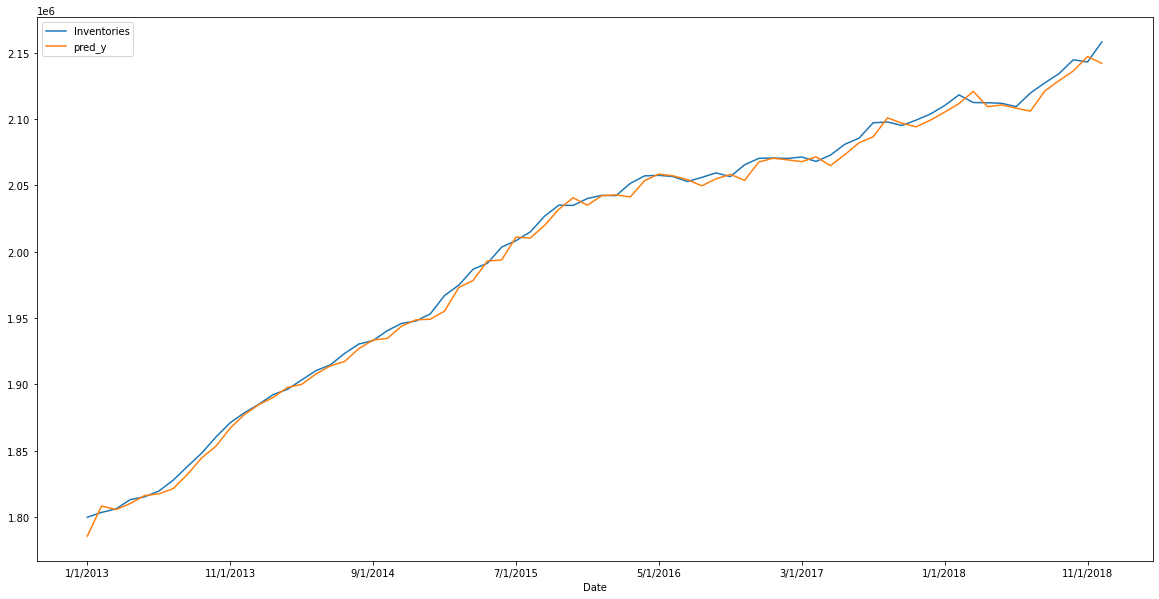

In [13]:
res.plot(kind = 'line', figsize = [20,10])

## 評估預測結果

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(test_y, pred_y)

33263606.72526867

In [15]:
r2_score(test_y, pred_y)

0.9968362286615111

## 與原數據一起繪製

In [16]:
ori = train_y.to_frame()

In [17]:
ori['pred_y'] = train_y 

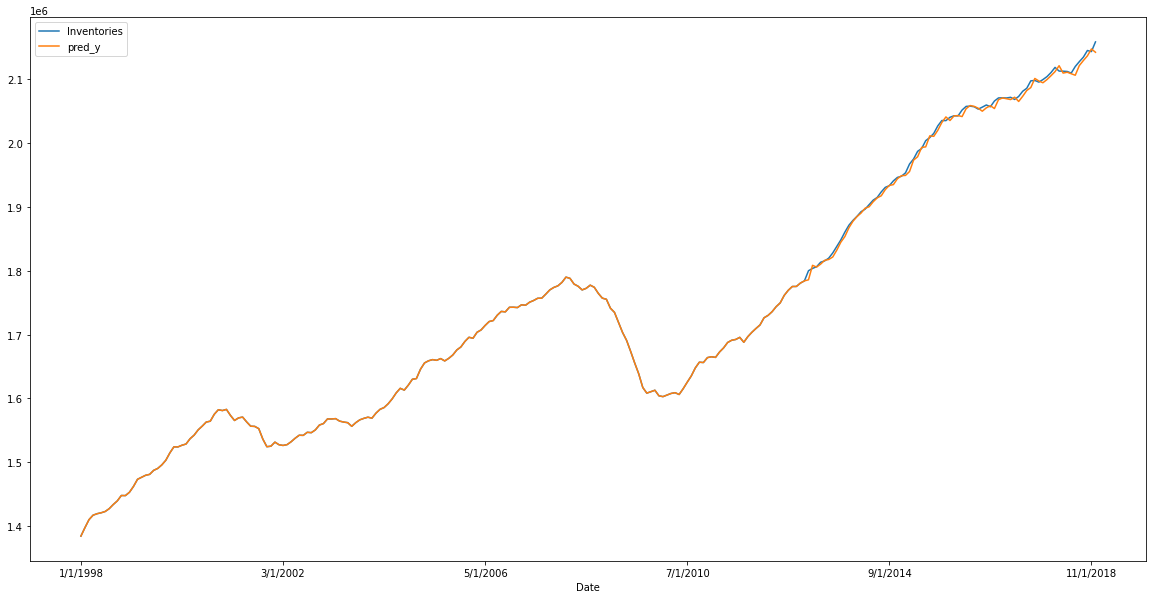

In [18]:
m = pandas.concat([ori, res])
m.plot(kind = 'line', figsize = [20,10])